# Практическое задание № 4. Вариант 3.
#### Решается задача интегрирования при помощи квадратур Гаусса.

In [3]:
import numpy as np
from numpy.polynomial.legendre import leggauss
import matplotlib.pyplot as plt
from math import factorial
from scipy.integrate import quad
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

1. Функция вычисления коэффициентов квадратурных формул по значениям сетки.

In [4]:
def gauss_weights(x_nodes):
    A = np.zeros((len(x_nodes), len(x_nodes)))
    b = np.zeros(len(x_nodes))
    
    for k in range(len(x_nodes)):
        A[k] = x_nodes ** k
        if k % 2 == 0:
            b[k] = 2 / (k + 1)
        else:
            b[k] = 0.0
    w = np.linalg.solve(A, b)
    return w

2. Вычисление сетки квадратуры Гаусса (при помощи трёхдиагональной системы).

In [5]:
def gauss_nodes(n):
    J = np.zeros((n, n))
    for i in range(1, n):
        J[i, i-1] = J[i-1, i] = i / np.sqrt(4 * i ** 2 - 1)
    return np.linalg.eigh(J)[0]

3. Проверить правильность вычисления нулей полиномов Лежандра при помощи numpy.

In [9]:
def check_legendre_roots(n):
    print(abs(leggauss(n)[0] - gauss_nodes(n)))

check_legendre_roots(7)

[0.00000000e+00 1.11022302e-16 5.55111512e-17 6.04782827e-17
 5.55111512e-17 0.00000000e+00 1.11022302e-16]


4. Построить график сходимости приближения интеграла.

In [10]:
def plot_convergence(f, true_value, theor=False, der=0):
    errors = []
    theor_errors = []
    linspace = range(1, 8)
    if theor:
        for n in linspace:
            nodes = gauss_nodes(n)
            weights = gauss_weights(nodes)
            approx = np.sum(weights * f(nodes))
            errors.append(abs(approx - true_value))
            nodes_prod = lambda t: np.abs(np.prod(np.full(n, t) - nodes))
            theor_errors.append(der * quad(nodes_prod, -1, 1)[0] / factorial(n))
    else:
        for n in linspace:
            nodes = gauss_nodes(n)
            weights = gauss_weights(nodes)
            approx = np.sum(weights * f(nodes))
            errors.append(abs(approx - true_value))

    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(10, 5))
        plt.semilogy(linspace, errors, label='Практическая  ошибка')
        if theor:
            plt.semilogy(linspace, theor_errors, color='red', label='Теоретическая ошибка')
            plt.legend()
        plt.xlabel('Число узлов')
        plt.ylabel('Ошибка')
        plt.title('Сходимость приближения интеграла методом квадратур Гаусса')
        

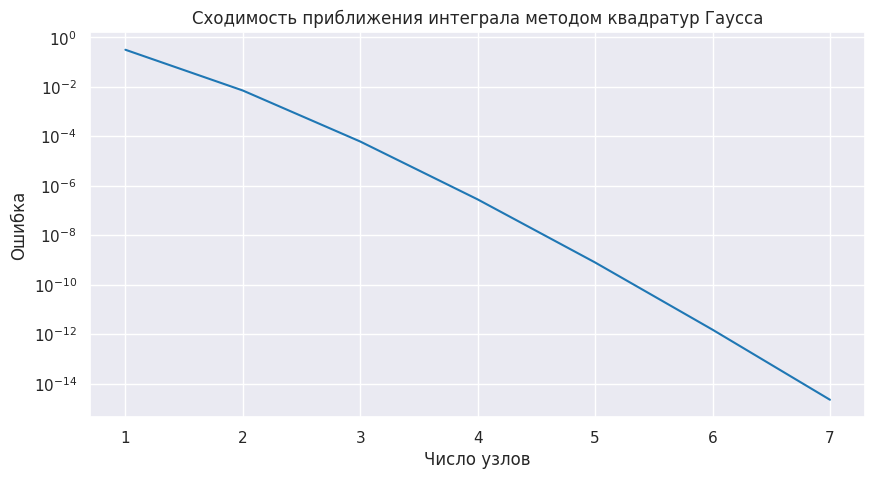

In [11]:
f = lambda x: np.cos(x)
true_value = 2 * np.sin(1)
plot_convergence(f, true_value)

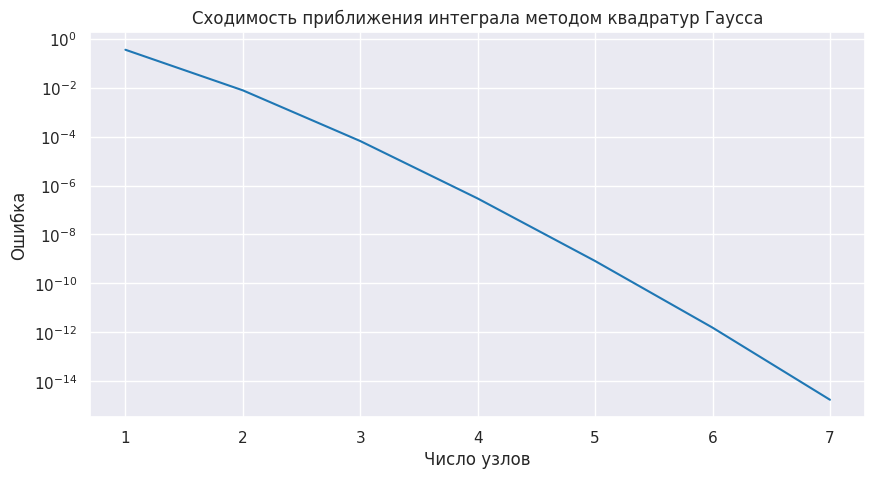

In [12]:
f = lambda x: np.exp(x)
true_value = np.e - 1 / np.e
plot_convergence(f, true_value)

5. Теоретически оценить ошибку метода и построить график теоретической оценки в тех же осях.

$\quad\quad E_n \leq \frac{||f^{(n)}||_C}{n!}\left( \frac{b-a}{2} \right)^{n+1}\int_{-1}^1|{\prod_1^n(t-t_i)}|dt$

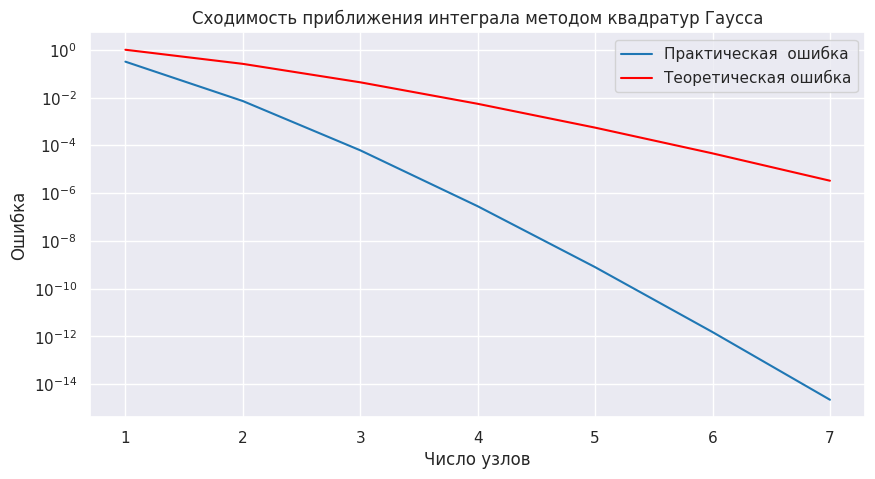

In [13]:
f = lambda x: np.cos(x)
true_value = 2 * np.sin(1)
plot_convergence(f, true_value, True, 1)

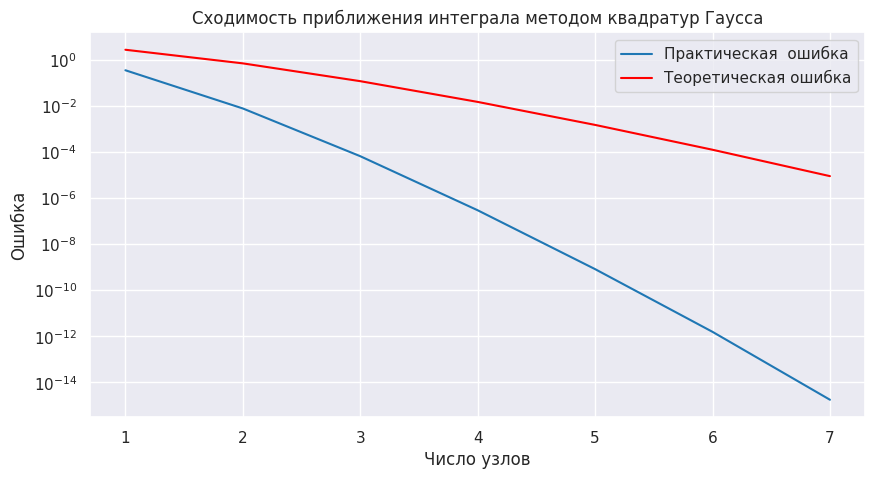

In [14]:
f = lambda x: np.exp(x)
true_value = np.e - 1 / np.e
plot_convergence(f, true_value, True, np.e)